In [34]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import arff as arf

In [35]:
file = open("final-dataset.arff")
decoder=arf.ArffDecoder()
data=decoder.decode(file,encode_nominal=True)

In [3]:
vals=[val[0:-1] for val in data[ 'data']]
labels=[lab[-1] for lab in data['data']]

In [4]:
da=set(labels)
brac=600
templ=[]
tempd=[]
for i in da:
    coun=0
    while coun<brac:
        for j in range(len(labels)):
            if labels[j]:
                templ.append(labels[j])
                tempd.append(vals[j])
                coun+=1
            if coun==brac:
                break
vals=tempd
labels=templ


In [5]:
l=len(vals)
print(l)


3000


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(vals,labels,stratify=labels,test_size=0.9,random_state=0)

In [7]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)
y_train=numpy.array(Y_train)
y_test=numpy.array(Y_test)

In [8]:
svm_accuracy = []

model=SVC(kernel='sigmoid',gamma='auto')
model.fit(x_train,y_train)


SVC(gamma='auto', kernel='sigmoid')

In [9]:
y_pred=model.predict(x_test)

In [10]:
svm_accuracy=accuracy_score(y_pred,y_test)*100
print(svm_accuracy,"%")

92.77777777777779 %


In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


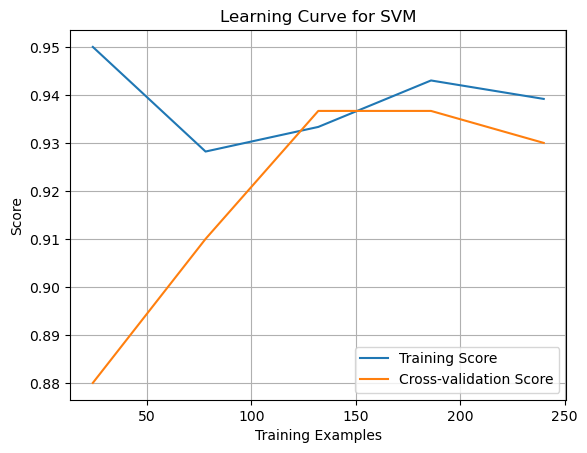

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)
plt.plot(train_sizes, numpy.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, numpy.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred_knn = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_pred_knn, y_test) * 100
print("KNN Accuracy:", knn_accuracy, "%")

KNN Accuracy: 94.14814814814815 %


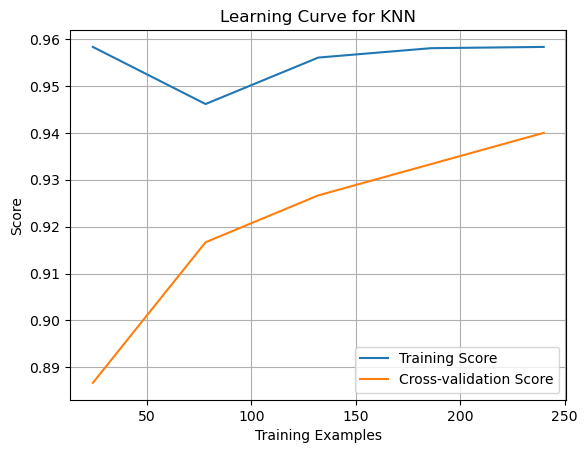

In [15]:
train_sizes, train_scores, test_scores = learning_curve(knn_model, x_train, y_train, cv=5)
plt.plot(train_sizes, numpy.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, numpy.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [17]:
y_pred_nb = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_pred_nb, y_test) * 100
print("Naive Bayes Accuracy:", nb_accuracy, "%")

Naive Bayes Accuracy: 85.62962962962963 %


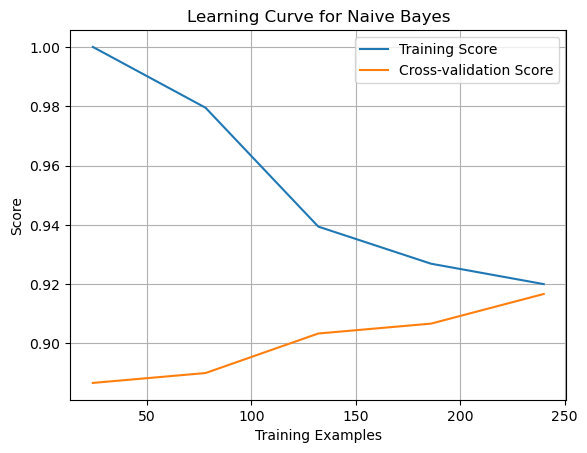

In [18]:
train_sizes, train_scores, test_scores = learning_curve(nb_model, x_train, y_train, cv=5)
plt.plot(train_sizes, numpy.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, numpy.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
train_x,val_x,train_y,val_y=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2,random_state=0)

In [20]:
print(x_train.shape,x_test.shape)

(300, 27) (2700, 27)


In [21]:
columns=['SRC_ADD',' DES_ADD','PKT_ID','FROM_NODE','TO_NODE',
'PKT_TYPE','PKT_SIZE','FLAGS','FID ','SEQ_NUMBER','NUMBER_OF_PKT',
'NUMBER_OF_BYTE','NODE_NAME_FROM','NODE_NAME_FROM','PKT_IN',
'PKT_OUT',' PKT_R','PKT_DELAY_NODE','PKT_RATE ','BYTE_RATE',' PKT_AVG_SIZE',
'UTILIZATION','PKT_DELAY ','PKT_SEND_TIME ','PKT_RESEVED_TIME','FIRST_PKT_SENT',
'LAST_PKT_RESEVED']

In [22]:
model1=SVC(kernel='sigmoid',gamma='auto')
model1.fit(train_x,train_y)
y_val_pred1=model1.predict(val_x)
y_val_pred1=pd.DataFrame(y_val_pred1)
y_test_pred1=model1.predict(x_test)
y_test_pred1=pd.DataFrame(y_test_pred1)


In [23]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
y_val_pred2=model2.predict(val_x)
y_val_pred2=pd.DataFrame(y_val_pred2)
y_test_pred2=model2.predict(x_test)
y_test_pred2=pd.DataFrame(y_test_pred2)

In [24]:
model3 = GaussianNB()
model3.fit(train_x,train_y)
y_val_pred3=model3.predict(val_x)
y_val_pred3=pd.DataFrame(y_val_pred3)
y_test_pred3=model3.predict(x_test)
y_test_pred3=pd.DataFrame(y_test_pred3)


In [25]:
test_input=pd.concat([pd.DataFrame(x_test,columns=columns),y_test_pred1,y_test_pred2,y_test_pred3],axis=1)
val_input=pd.concat([pd.DataFrame(val_x,columns=columns),y_val_pred1,y_val_pred2,y_val_pred3],axis=1)

In [26]:
print(test_input)

       SRC_ADD   DES_ADD    PKT_ID  FROM_NODE   TO_NODE  PKT_TYPE  PKT_SIZE  \
0     1.161761  0.235621 -0.366395  -0.065127 -0.596743  0.370157 -0.168019   
1    -0.677738  0.131870  3.104028   0.380423  0.160759  0.370157 -0.214217   
2    -0.814560  0.195952 -0.637618   0.677457  0.918261  0.370157 -0.168019   
3    -0.358486  0.205106 -0.441931   0.677457  0.918261  0.370157 -0.168019   
4    -0.206461  0.208158 -0.569869   0.677457  0.918261  0.370157 -0.168019   
...        ...       ...       ...        ...       ...       ...       ...   
2695  0.097588  0.214261 -0.301426   0.677457  0.918261  0.370157 -0.168019   
2696 -0.206461  0.208158 -0.569878   0.677457  0.918261  0.370157 -0.168019   
2697  2.060227 -3.914420  0.728063   0.677457 -0.596743 -1.101750 -0.301532   
2698 -0.084842  0.086098 -0.025854  -1.253262 -0.596743  1.842064  5.748609   
2699 -1.422659  0.183746 -0.148400   0.677457  0.918261  0.370157 -0.242676   

      FLAGS      FID   SEQ_NUMBER  ...   PKT_AVG_SI

In [27]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
y_pred_rf = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_pred_rf, y_test) * 100
print("Random Forest Accuracy:", rf_accuracy, "%")

Random Forest Accuracy: 96.22222222222221 %


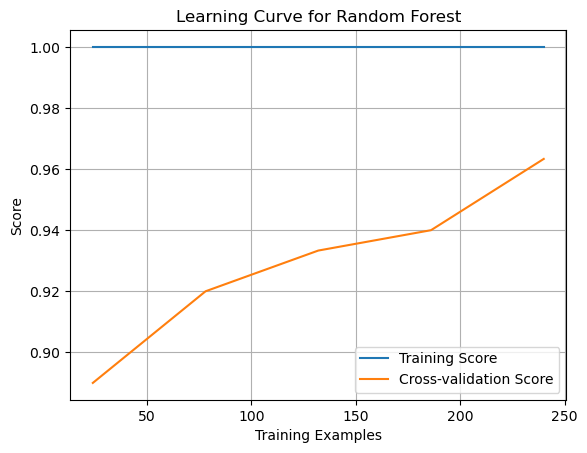

In [29]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, x_train, y_train, cv=5)
plt.plot(train_sizes, numpy.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, numpy.mean(test_scores, axis=1), label='Cross-validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

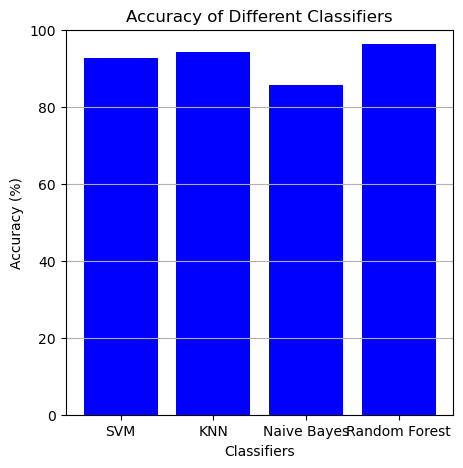

In [30]:
accuracy_scores = [svm_accuracy, knn_accuracy, nb_accuracy, rf_accuracy]

# Names of the classifiers
classifiers = ['SVM', 'KNN', 'Naive Bayes', 'Random Forest']

# Plotting the bar graph
plt.figure(figsize=(5,5))  # Set the figure size
plt.bar(classifiers, accuracy_scores, color=['blue', 'blue', 'blue', 'blue'])  # Plot the bar graph
plt.title('Accuracy of Different Classifiers')  # Set the title of the plot
plt.xlabel('Classifiers')  # Set the label for the x-axis
plt.ylabel('Accuracy (%)')  # Set the label for the y-axis
plt.ylim(0, 100)  # Set the y-axis limits
plt.grid(axis='y')  # Enable grid for the y-axis
plt.show()  # Display the plot

In [31]:
import pickle

# Assuming you have trained models named svm_model, knn_model, nb_model, rf_model

# Save the models
with open("svm_model.pkl", "wb") as f:
    pickle.dump(model1, f)

with open("knn_model.pkl", "wb") as f:
    pickle.dump(model2, f)

with open("nb_model.pkl", "wb") as f:
    pickle.dump(model3, f)

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


In [32]:
import pickle

# Load the models
svm_model = pickle.load(open("svm_model.pkl", "rb"))
knn_model = pickle.load(open("knn_model.pkl", "rb"))
nb_model = pickle.load(open("nb_model.pkl", "rb"))
rf_model = pickle.load(open("rf_model.pkl", "rb"))


In [33]:
import pickle

# Load your trained models (replace with actual model instances)
# For demonstration, assuming the models are already loaded into memory
svm_model = model1
knn_model = model2
nb_model = model3
rf_model = rf_model

def preprocess_data(log):
    """
    Preprocesses the network log data to match the format expected by the models.

    Args:
        log (dict): A dictionary containing network log attributes.

    Returns:
        array-like: Preprocessed data ready for prediction.
    """
    # Extract relevant features from the log dictionary
    processed_data = [
        log["PKT_RATE"], log["PKT_SIZE"], log["NUMBER_OF_PKT"],
        log["FLAGS_SF"], log["FLAGS_S0"], log["FLAGS_SA"],
        log["FLAGS_RA"], log["FLAGS_PA"], log["FLAGS_FRA"],
        log["FLAGS_SF2"], log["FLAGS_REJ"], log["FLAGS_RSTO"],
        log["FLAGS_RSTOS0"], log["FLAGS_RSTR"], log["FLAGS_S2"],
        log["FLAGS_S1"], log["FLAGS_OTH"], log["DURATION"],
        log["SRC_BYTES"], log["DST_BYTES"], log["LAND"],
        log["WRONG_FRAGMENT"], log["URGENT"], log["HOT"],
        log["NUM_FAILED_LOGINS"], log["IS_HOST_LOGIN"],
        log["IS_GUEST_LOGIN"]
    ]
    return processed_data

def predict_ddos(log):
    """
    Predicts if a network log is a potential DDoS using loaded models.

    Args:
        log (dict): A dictionary containing network log attributes.

    Returns:
        str: "DDoS" if potential DDoS, "Normal" otherwise.
    """
    try:
        # Preprocess the log data
        processed_log = preprocess_data(log)

        # Make predictions with each model
        svm_pred = svm_model.predict([processed_log])[0]
        knn_pred = knn_model.predict([processed_log])[0]
        nb_pred = nb_model.predict([processed_log])[0]
        rf_pred = rf_model.predict([processed_log])[0]

        # Implement your chosen ensemble approach (e.g., majority vote)
        if sum([svm_pred, knn_pred, nb_pred, rf_pred]) >= 3:
            return "DDoS"
        else:
            return "Normal"

    except Exception as e:
        # Handle any errors gracefully
        return f"Error: {e}"

# Example usage
new_log = {
    "PKT_RATE": 1200, "PKT_SIZE": 60, "NUMBER_OF_PKT": 2000,
    "FLAGS_SF": 1, "FLAGS_S0": 0, "FLAGS_SA": 0, "FLAGS_RA": 1,
    "FLAGS_PA": 0, "FLAGS_FRA": 0, "FLAGS_SF2": 1, "FLAGS_REJ": 0,
    "FLAGS_RSTO": 0, "FLAGS_RSTOS0": 0, "FLAGS_RSTR": 0,
    "FLAGS_S2": 0, "FLAGS_S1": 0, "FLAGS_OTH": 0, "DURATION": 200,
    "SRC_BYTES": 5000, "DST_BYTES": 3000, "LAND": 0, "WRONG_FRAGMENT": 0,
    "URGENT": 0, "HOT": 0, "NUM_FAILED_LOGINS": 0,
    "IS_HOST_LOGIN": 0, "IS_GUEST_LOGIN": 0
}
prediction = predict_ddos(new_log)
print(f"Network log classified as: {prediction}")

Network log classified as: DDoS
